In [1]:
library(bnlearn)

data(asia)
head(asia)

,A,S,T,L,B,E,X,D
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,yes
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes
6,no,yes,no,no,no,no,no,yes


In [2]:
asia.net <- bn.fit(hc(asia, debug = F, 
                      whitelist = data.frame(from = c("A", "A", "B"), to = c("L", "T", "X"))), 
                   asia)
asia.net


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
     no    yes 
0.9916 0.0084 

  Parameters of node S (multinomial distribution)

Conditional probability table:
 
     L
S            no       yes
  no  0.5248394 0.1030303
  yes 0.4751606 0.8969697

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
     A
T              no         yes
  no  0.991528842 0.952380952
  yes 0.008471158 0.047619048

  Parameters of node L (multinomial distribution)

Conditional probability table:
 
     A
L             no        yes
  no  0.93424768 0.90476190
  yes 0.06575232 0.09523810

  Parameters of node B (multinomial distribution)

Conditional probability table:
 
     S
B            no       yes
  no  0.7006036 0.2823062
  yes 0.2993964 0.7176938

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , L = no

     T
E     no yes
  no   1   0
  yes  0   1

, , L = yes



In [34]:
cpquery(asia.net, (T=="yes"), TRUE, debug = T, n = 40000)
cpquery(asia.net, (L=="yes"), TRUE, n = 40000)
cpquery(asia.net, (B=="yes"), TRUE, n = 50000)

* checking which nodes are needed.
  > event involves the following nodes: T 
  > evidence involves the following nodes:  
  > upper closure is ' T A '
  > generating observations from 2 / 8 nodes.
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 88 samples out of 10000 (p = 0.0088).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 94 samples out of 10000 (p = 0.0094).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 79 samples out of 10000 (p = 0.0079).
* generated 10000 samples from the bayesian network.
  > evidence matches 10000 samples out of 10000 (p = 1).
  > event matches 82 samples out of 10000 (p = 0.0082).
* generated a grand total of 40000 samples.
  > event matches 343 samples out of 40000 (p = 0.008575).


[1] 0.008575

[1] 0.063975

[1] 0.5108

In [60]:
cpquery(asia.net, (T=="yes"), (A=="yes" & S=="no"), n = 100000)
cpquery(asia.net, (L=="yes"), (A=="yes" & S=="no"), n = 100000, debug = T)
cpquery(asia.net, (B=="yes"), (A=="yes" & S=="no"), n = 100000)

[1] 0.05011933

* checking which nodes are needed.
  > event involves the following nodes: L 
  > evidence involves the following nodes: A S 
  > upper closure is ' S L A '
  > generating observations from 3 / 8 nodes.
* generated 10000 samples from the bayesian network.
  > evidence matches 42 samples out of 10000 (p = 0.0042).
  > event matches 2 samples out of 42 (p = 0.04761905).
* generated 10000 samples from the bayesian network.
  > evidence matches 33 samples out of 10000 (p = 0.0033).
  > event matches 0 samples out of 33 (p = 0).
* generated 10000 samples from the bayesian network.
  > evidence matches 48 samples out of 10000 (p = 0.0048).
  > event matches 2 samples out of 48 (p = 0.04166667).
* generated 10000 samples from the bayesian network.
  > evidence matches 36 samples out of 10000 (p = 0.0036).
  > event matches 0 samples out of 36 (p = 0).
* generated 10000 samples from the bayesian network.
  > evidence matches 38 samples out of 10000 (p = 0.0038).
  > event matches 0 samples out

[1] 0.01463415

[1] 0.2544529

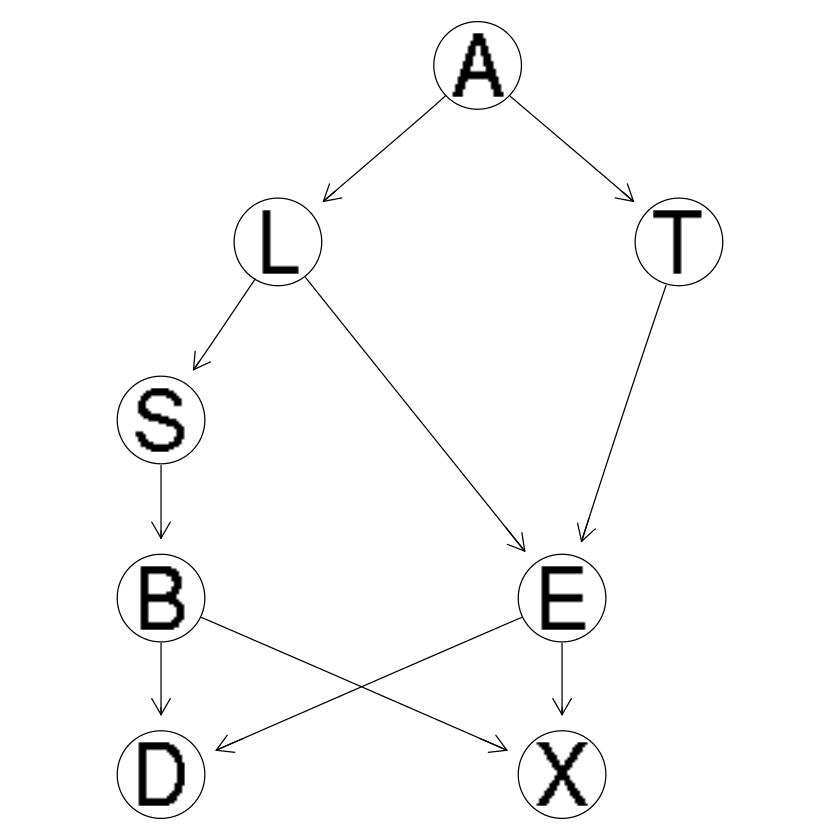

In [39]:
library(Rgraphviz)
graphviz.plot(asia.net)

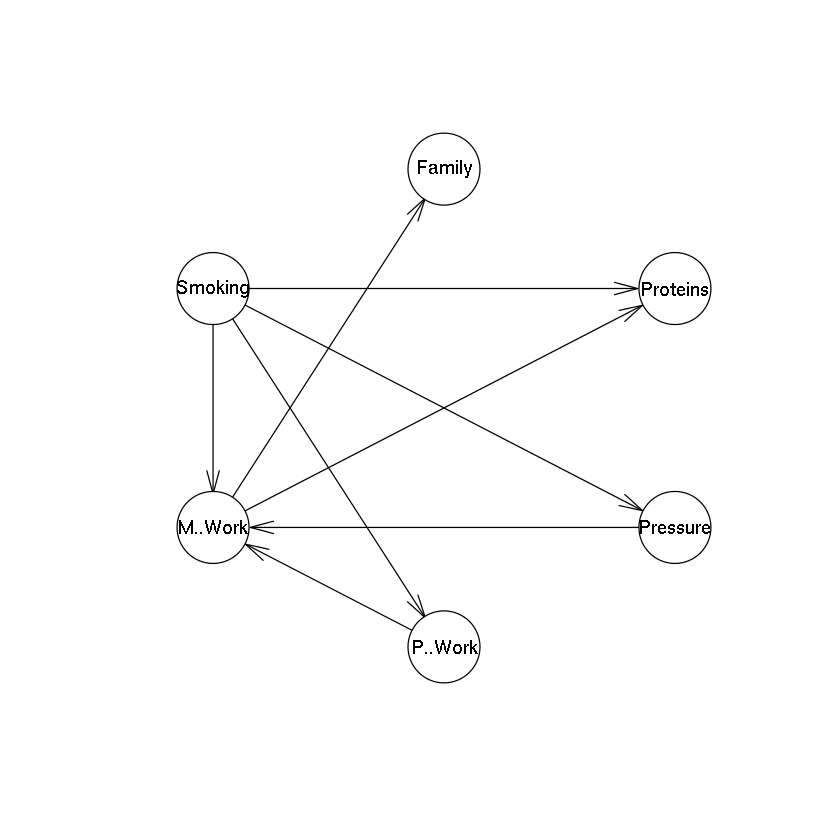

In [58]:
data(coronary)
bn_df <- data.frame(coronary)
res <- hc(bn_df)
plot(res)

In [61]:
fittedbn <- bn.fit(res, data = bn_df)
fittedbn$Smoking


  Parameters of node Smoking (multinomial distribution)

Conditional probability table:
        no       yes 
0.5219989 0.4780011 

In [68]:
cpquery(fittedbn, event = (Proteins=="<3"), evidence = ( Smoking=="no"), debug = T )

* checking which nodes are needed.
  > event involves the following nodes: Proteins 
  > evidence involves the following nodes: Smoking 
  > upper closure is ' Proteins M..Work P..Work Pressure Smoking '
  > generating observations from 5 / 6 nodes.
* generated 5000 samples from the bayesian network.
  > evidence matches 2602 samples out of 5000 (p = 0.5204).
  > event matches 1578 samples out of 2602 (p = 0.6064566).


[1] 0.6064566